# E-Commerce Data Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('transaction.csv')
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,2024-01-12 23:39:55,PayPal,health & beauty,2,29,North Laurafort,desktop,27.245.104.92,USNV Griffin\nFPO AA 52700,USNV Griffin\nFPO AA 52700,0,149,23
1472948,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,2024-03-27 04:31:45,credit card,clothing,2,32,Burnsville,tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, GA 68797","478 John Square Apt. 235\nMillerhaven, GA 68797",0,132,4
1472949,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,2024-01-31 23:51:42,bank transfer,electronics,4,36,Garciafort,mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, OH ...","182 House Island Suite 198\nEast Scott, FM 84301",0,98,23
1472950,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,2024-01-12 16:21:32,bank transfer,electronics,5,34,Lake Josephberg,desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...","27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...",0,191,16


* Transaction ID: A unique identifier for each transaction.
* Customer ID: A unique identifier for each customer.
* Transaction Amount: The total amount of money exchanged in the transaction.
* Transaction Date: The date and time when the transaction took place.
* Payment Method: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
* Product Category: The category of the product involved in the transaction.
* Quantity: The number of products involved in the transaction.
* Customer Age: The age of the customer making the transaction.
* Customer Location: The geographical location of the customer.
* Device Used: The type of device used to make the transaction (e.g., mobile, desktop).
* IP Address: The IP address of the device used for the transaction.
* Shipping Address: The address where the product was shipped.
* Billing Address: The address associated with the payment method.
* Is Fraudulent: A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).
* Account Age Days: The age of the customer's account in days at the time of the transaction.
* Transaction Hour: The hour of the day when the transaction occurred.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [4]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06
mean,2.267683e+02,3.000230e+00,3.451208e+01,5.012926e-02,1.796464e+02,1.128696e+01
std,2.703951e+02,1.414736e+00,1.000313e+01,2.182117e-01,1.068642e+02,6.975995e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.861000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [5]:
df.describe(include='O')

,Transaction ID,Customer ID,Transaction Date,Payment Method,Product Category,Customer Location,Device Used,IP Address,Shipping Address,Billing Address
count,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952
unique,1472952,1472952,1346684,4,5,99135,3,1472651,1472948,1472949
top,d1a811a2-6015-47fa-95e5-0a5282755932,637d5ed1-a4af-4234-a1d9-a3791b6f1bb6,2024-01-27 04:00:16,credit card,health & beauty,New Michael,mobile,180.6.220.53,USS Sanchez\nFPO AE 14652,USCGC Brown\nFPO AE 16210
freq,1,1,6,368429,295367,1258,491743,2,2,2


In [6]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [7]:
df.columns = df.columns.str.replace(" ", "", regex=False)

In [8]:
df.columns

Index(['TransactionID', 'CustomerID', 'TransactionAmount', 'TransactionDate',
       'PaymentMethod', 'ProductCategory', 'Quantity', 'CustomerAge',
       'CustomerLocation', 'DeviceUsed', 'IPAddress', 'ShippingAddress',
       'BillingAddress', 'IsFraudulent', 'AccountAgeDays', 'TransactionHour'],
      dtype='object')

In [9]:
df['PaymentMethod'].value_counts()

PaymentMethod
credit card      368429
bank transfer    368278
debit card       368277
PayPal           367968
Name: count, dtype: int64

In [10]:
df['ProductCategory'].value_counts()

ProductCategory
health & beauty    295367
electronics        295294
clothing           294319
toys & games       294266
home & garden      293706
Name: count, dtype: int64

In [11]:
df['DeviceUsed'].value_counts()

DeviceUsed
mobile     491743
tablet     490938
desktop    490271
Name: count, dtype: int64

In [12]:
df['CustomerLocation'].value_counts()

CustomerLocation
New Michael            1258
South Michael          1209
East Michael           1206
Port Michael           1204
West Michael           1201
                       ... 
South Mistyton            1
New Monicaborough         1
West Conniechester        1
North Alexisside          1
North Charlotteland       1
Name: count, Length: 99135, dtype: int64

#### 1.Target Variable Distribution

C:\Users\chnar\AppData\Local\Temp\ipykernel_24364\1277636538.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="IsFraudulent", palette="Set2")


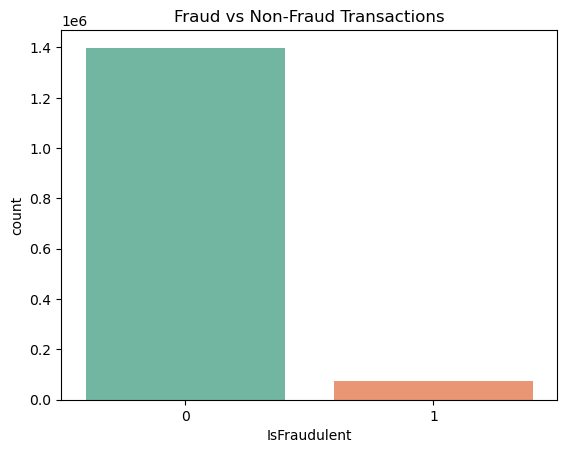

In [13]:
sns.countplot(data=df, x="IsFraudulent", palette="Set2")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


* The dataset is highly imbalanced, with non-fraudulent transactions (~1.4M) far outnumbering fraudulent ones (~70k).
* This imbalance means models may favor predicting "Not Fraud," so metrics like Recall, F1, and ROC-AUC are more meaningful than accuracy.

#### 2.Transaction Amount Distribution

C:\Users\chnar\AppData\Local\Temp\ipykernel_24364\3039858031.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="IsFraudulent", y="TransactionAmount", palette="Set2")


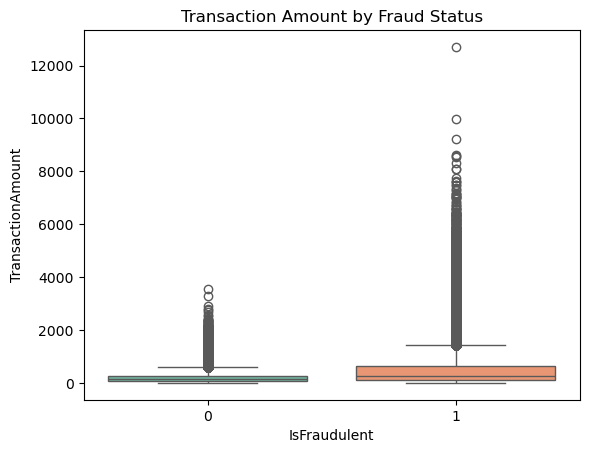

In [14]:
sns.boxplot(data=df, x="IsFraudulent", y="TransactionAmount", palette="Set2")
plt.title("Transaction Amount by Fraud Status")
plt.show()


* Fraudulent transactions generally involve higher amounts compared to non-fraudulent ones.
* There are also more extreme outliers in fraud cases, indicating fraudsters often target large-value transactions.

#### 3.Payment Method vs Fraud

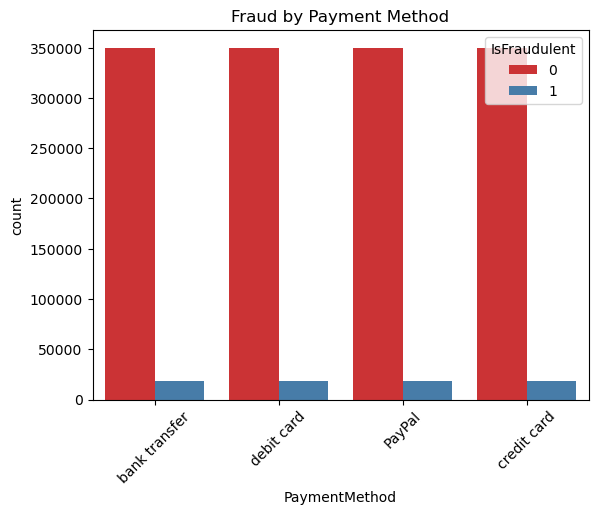

In [15]:
sns.countplot(data=df, x="PaymentMethod", hue="IsFraudulent", palette="Set1")
plt.xticks(rotation=45)
plt.title("Fraud by Payment Method")
plt.show()


* Fraudulent transactions are far fewer compared to non-fraudulent ones across all payment methods.
* No single payment method shows a disproportionately higher fraud rate — fraud is fairly consistent across methods.

#### 4. Product Category vs Fraud

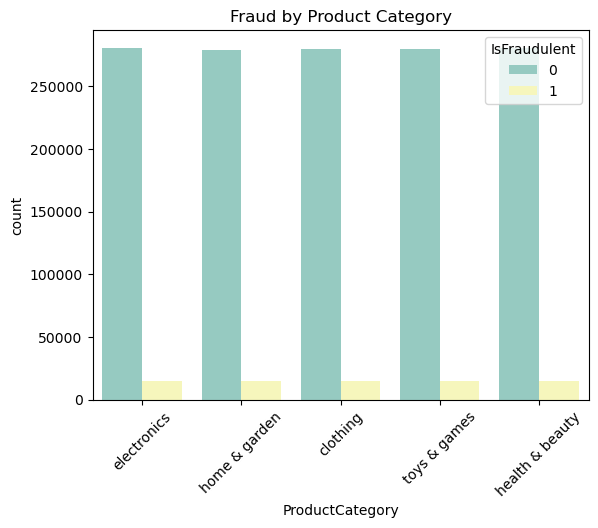

In [16]:
sns.countplot(data=df, x="ProductCategory", hue="IsFraudulent", palette="Set3")
plt.xticks(rotation=45)
plt.title("Fraud by Product Category")
plt.show()


* Non-fraudulent transactions dominate in all product categories.
* Fraudulent transactions are spread across categories without one specific category standing out.

#### 5. Transaction Hour vs Fraud

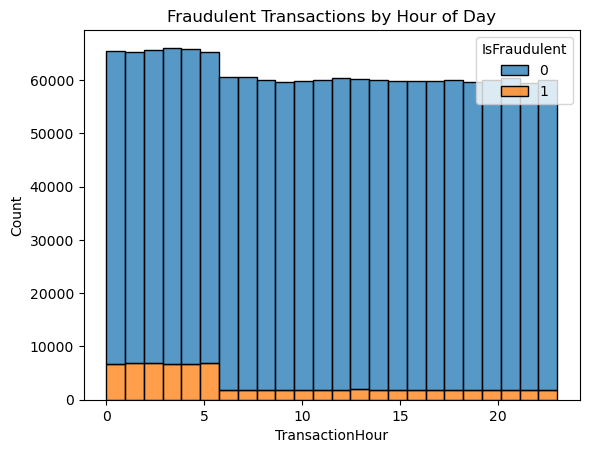

In [17]:
sns.histplot(data=df, x="TransactionHour", hue="IsFraudulent", multiple="stack", bins=24)
plt.title("Fraudulent Transactions by Hour of Day")
plt.show()


* Fraudulent transactions are more frequent during the late-night to early-morning hours (0–5 AM). After that, the fraud count drops but remains steady throughout the day.

#### 6.Customer Age vs Fraud

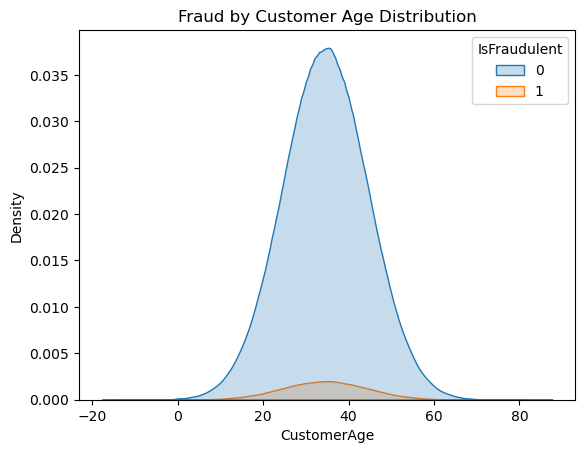

In [18]:
sns.kdeplot(data=df, x="CustomerAge", hue="IsFraudulent", fill=True)
plt.title("Fraud by Customer Age Distribution")
plt.show()


* Most transactions, including frauds, are concentrated in customers aged 25–45. Fraudulent activity follows a similar age distribution as non-fraudulent transactions.

#### 7.Account Age (Days) vs Fraud

C:\Users\chnar\AppData\Local\Temp\ipykernel_24364\570932466.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="IsFraudulent", y="AccountAgeDays", palette="coolwarm")


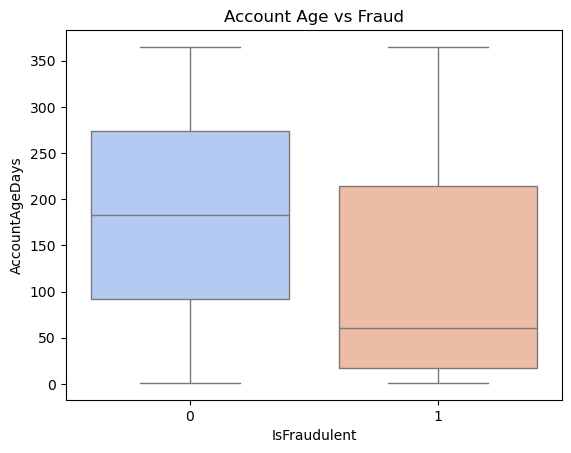

In [19]:
sns.boxplot(data=df, x="IsFraudulent", y="AccountAgeDays", palette="coolwarm")
plt.title("Account Age vs Fraud")
plt.show()


* Fraudulent accounts tend to be significantly newer, with a lower median age and less variability in account age. This suggests fraudsters often operate with freshly created accounts to avoid detection.

#### 8.Customer Location Heatmap (Top Cities)

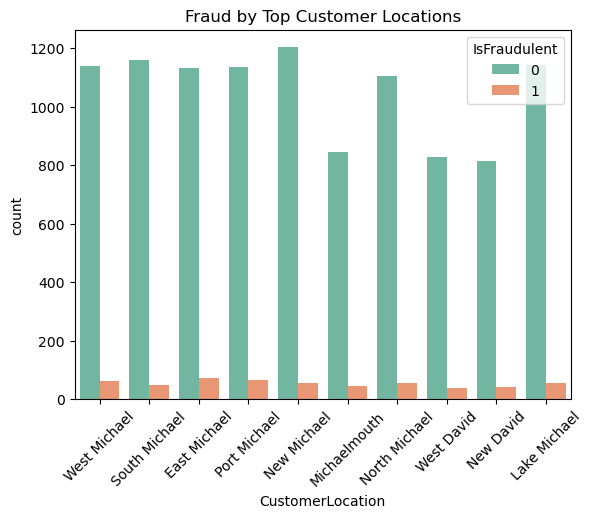

In [20]:
top_locations = df["CustomerLocation"].value_counts().nlargest(10).index
sns.countplot(data=df[df["CustomerLocation"].isin(top_locations)],
              x="CustomerLocation", hue="IsFraudulent", palette="Set2")
plt.xticks(rotation=45)
plt.title("Fraud by Top Customer Locations")
plt.show()


* All customer locations show more non-fraudulent than fraudulent transactions, but Lake Michael stands out with the highest overall activity—potentially a hotspot worth deeper analysis.

#### 9.Device Used vs Fraud

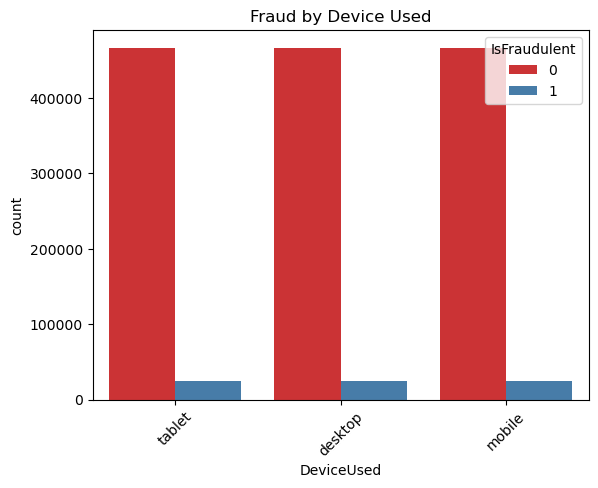

In [21]:
sns.countplot(data=df, x="DeviceUsed", hue="IsFraudulent", palette="Set1")
plt.xticks(rotation=45)
plt.title("Fraud by Device Used")
plt.show()


* Mobile devices show the highest volume of transactions overall, but fraud occurs across all device types, with desktops having a slightly higher proportion of fraudulent activity relative to total usage.

#### 10.Correlation Heatmap (Numerical Features)

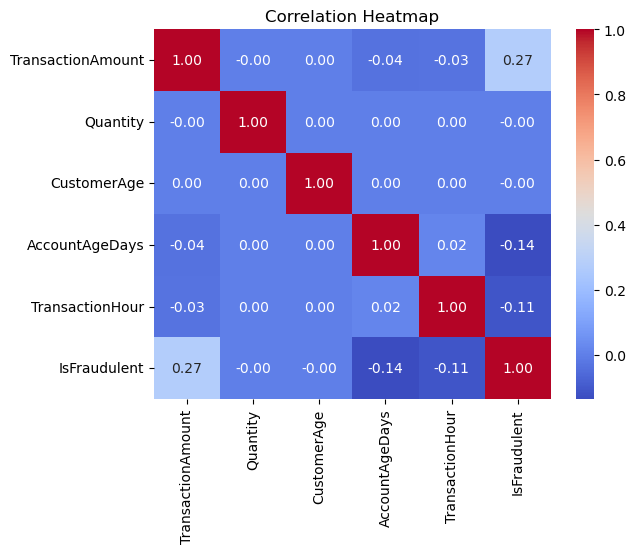

In [22]:
num_cols = ["TransactionAmount", "Quantity", "CustomerAge", "AccountAgeDays", "TransactionHour"]
corr = df[num_cols + ["IsFraudulent"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


* TransactionAmount has the strongest positive correlation with fraud, suggesting higher amounts may signal risk, while AccountAgeDays and TransactionHour show weak negative correlations, hinting that newer accounts and late-hour transactions might be more suspicious.

In [23]:
# Create a dictionary to store label encoders
label_encoders = {}

# List of columns to encode
columns_to_encode = ['PaymentMethod', 'ProductCategory', 'DeviceUsed',
                     'CustomerLocation']

# Encode each column and store its encoder
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use


In [24]:
df

,TransactionID,CustomerID,TransactionAmount,TransactionDate,PaymentMethod,ProductCategory,Quantity,CustomerAge,CustomerLocation,DeviceUsed,IPAddress,ShippingAddress,BillingAddress,IsFraudulent,AccountAgeDays,TransactionHour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,1,1,1,17,663,2,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,3,1,2,40,17313,0,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,0,3,2,22,6790,2,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,1,0,5,31,36744,0,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,1,0,2,51,82691,2,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,2024-01-12 23:39:55,0,2,2,29,56305,0,27.245.104.92,USNV Griffin\nFPO AA 52700,USNV Griffin\nFPO AA 52700,0,149,23
1472948,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,2024-03-27 04:31:45,2,0,2,32,3682,2,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, GA 68797","478 John Square Apt. 235\nMillerhaven, GA 68797",0,132,4
1472949,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,2024-01-31 23:51:42,1,1,4,36,19763,1,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, OH ...","182 House Island Suite 198\nEast Scott, FM 84301",0,98,23
1472950,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,2024-01-12 16:21:32,1,1,5,34,30658,0,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...","27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...",0,191,16


In [25]:
X=df.drop(columns=['TransactionID','CustomerID','ShippingAddress','BillingAddress','IsFraudulent','TransactionDate','IPAddress'])
y=df.IsFraudulent

In [26]:
X

,TransactionAmount,PaymentMethod,ProductCategory,Quantity,CustomerAge,CustomerLocation,DeviceUsed,AccountAgeDays,TransactionHour
0,58.09,1,1,1,17,663,2,30,5
1,389.96,3,1,2,40,17313,0,72,8
2,134.19,0,3,2,22,6790,2,63,3
3,226.17,1,0,5,31,36744,0,124,20
4,121.53,1,0,2,51,82691,2,158,5
...,...,...,...,...,...,...,...,...,...
1472947,208.48,0,2,2,29,56305,0,149,23
1472948,231.57,2,0,2,32,3682,2,132,4
1472949,101.80,1,1,4,36,19763,1,98,23
1472950,61.80,1,1,5,34,30658,0,191,16


In [27]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1472947    0
1472948    0
1472949    0
1472950    0
1472951    0
Name: IsFraudulent, Length: 1472952, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """Prints evaluation metrics and shows a confusion matrix heatmap"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    # Print metrics
    print(f"\n🔹 {model_name} Results")
    print("-"*50)
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    if y_proba is not None:
        print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))
    
    # Confusion Matrix (visual)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not Fraud (0)", "Fraud (1)"],
                yticklabels=["Not Fraud (0)", "Fraud (1)"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    print("="*50)


### 1. Logistic Regression


🔹 Logistic Regression Results
--------------------------------------------------
Accuracy: 0.7248

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83    279823
           1       0.11      0.67      0.20     14768

    accuracy                           0.72    294591
   macro avg       0.55      0.70      0.51    294591
weighted avg       0.93      0.72      0.80    294591

ROC-AUC: 0.7698


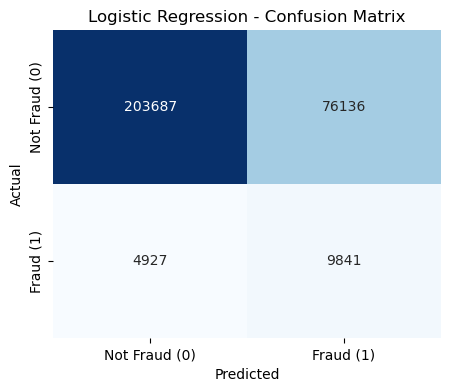

In [31]:
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")


### 2. Decision Tree


🔹 Decision Tree Results
--------------------------------------------------
Accuracy: 0.768

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86    279823
           1       0.14      0.71      0.23     14768

    accuracy                           0.77    294591
   macro avg       0.56      0.74      0.55    294591
weighted avg       0.94      0.77      0.83    294591

ROC-AUC: 0.8116


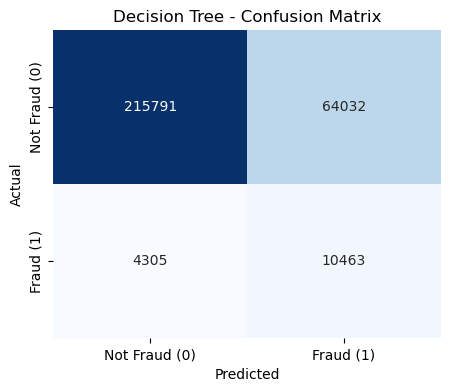

In [32]:
dt = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")

### 3. Random Forest


🔹 Random Forest Results
--------------------------------------------------
Accuracy: 0.9555

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279823
           1       0.79      0.15      0.25     14768

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.61    294591
weighted avg       0.95      0.96      0.94    294591

ROC-AUC: 0.8169


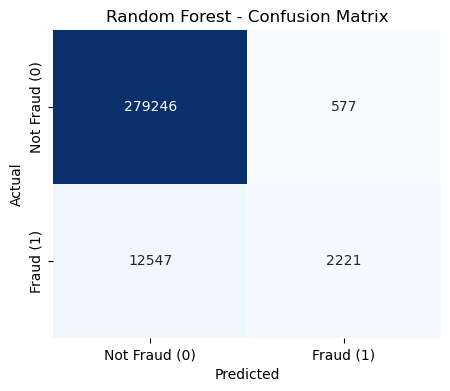

In [33]:
rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=15, 
    n_jobs=-1, 
    random_state=42
)

rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

### 4. XGBoost

C:\Users\chnar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:57:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost Results
--------------------------------------------------
Accuracy: 0.7889

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88    279823
           1       0.15      0.69      0.25     14768

    accuracy                           0.79    294591
   macro avg       0.57      0.74      0.56    294591
weighted avg       0.94      0.79      0.85    294591

ROC-AUC: 0.8152


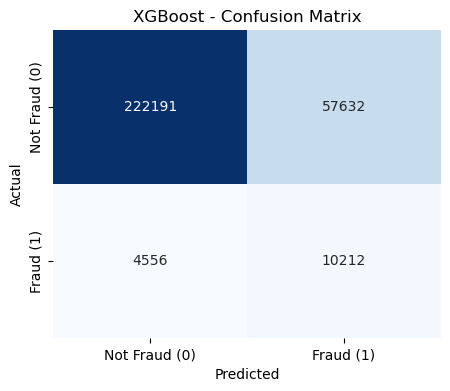

In [34]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=(y_train.tolist().count(0) / y_train.tolist().count(1)),
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test, "XGBoost")

### 5. CatBoost


🔹 CatBoost Results
--------------------------------------------------
Accuracy: 0.9555

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279823
           1       0.80      0.15      0.25     14768

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.61    294591
weighted avg       0.95      0.96      0.94    294591

ROC-AUC: 0.8181


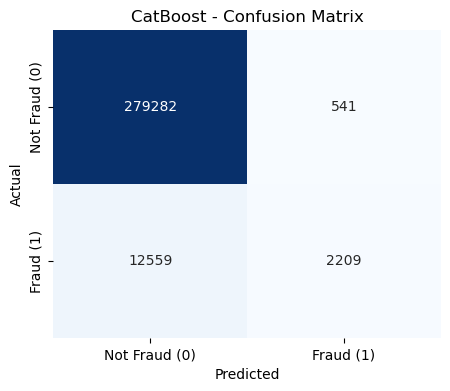

In [35]:
cat = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)
cat.fit(X_train, y_train)
evaluate_model(cat, X_test, y_test, "CatBoost")

### 6. Neural Network (MLP)


🔹 Neural Net Results
--------------------------------------------------
Accuracy: 0.9554

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279823
           1       0.81      0.14      0.24     14768

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.61    294591
weighted avg       0.95      0.96      0.94    294591

ROC-AUC: 0.8103


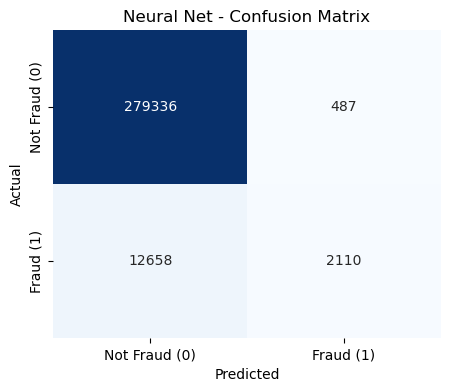

In [36]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64,),   # one hidden layer with 64 neurons (lighter)
    activation="relu",          # faster than 'tanh'
    solver="adam",              # efficient optimizer
    learning_rate_init=0.001,   # default, but can lower if unstable
    max_iter=100,               # fewer iterations for speed
    early_stopping=True,        # stops when no improvement
    n_iter_no_change=5,         # patience for early stopping
    random_state=42
)

mlp.fit(X_train, y_train)

evaluate_model(mlp, X_test, y_test, "Neural Net")

### 7. HistGradientBoostingClassifier

C:\Users\chnar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chnar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\chnar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chnar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^


🔹 HistGradientBoosting Results
--------------------------------------------------
Accuracy: 0.9555

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279823
           1       0.80      0.15      0.25     14768

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

ROC-AUC: 0.818


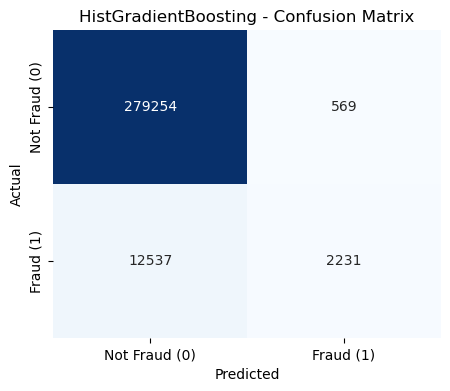

In [37]:
hgb = HistGradientBoostingClassifier(
    max_iter=200,        # number of boosting iterations
    max_depth=10,        # limit depth for speed and avoid overfitting
    learning_rate=0.1,   # step size
    random_state=42
)
hgb.fit(X_train, y_train)
evaluate_model(hgb, X_test, y_test, "HistGradientBoosting")

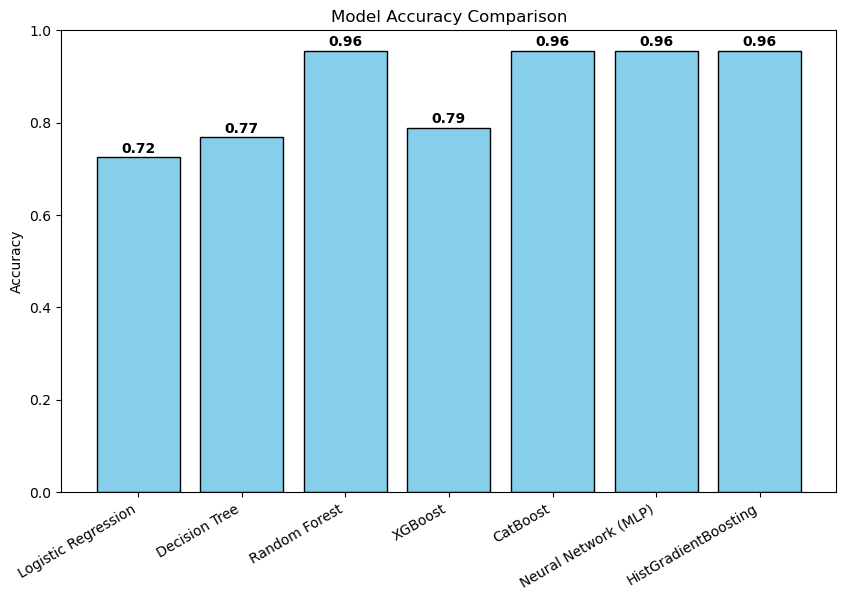

In [38]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb,
    "CatBoost": cat,
    "Neural Network (MLP)": mlp,
    "HistGradientBoosting": hgb
}

# Collect results
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

# Convert to DataFrame
accuracy_df = pd.DataFrame(results)

# Plot Accuracy Comparison
plt.figure(figsize=(10,6))
bars = plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"], 
               color="skyblue", edgecolor="black")

plt.xticks(rotation=30, ha="right")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)

# Annotate accuracy values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f"{bar.get_height():.2f}", ha="center", fontsize=10, fontweight="bold")

plt.show()


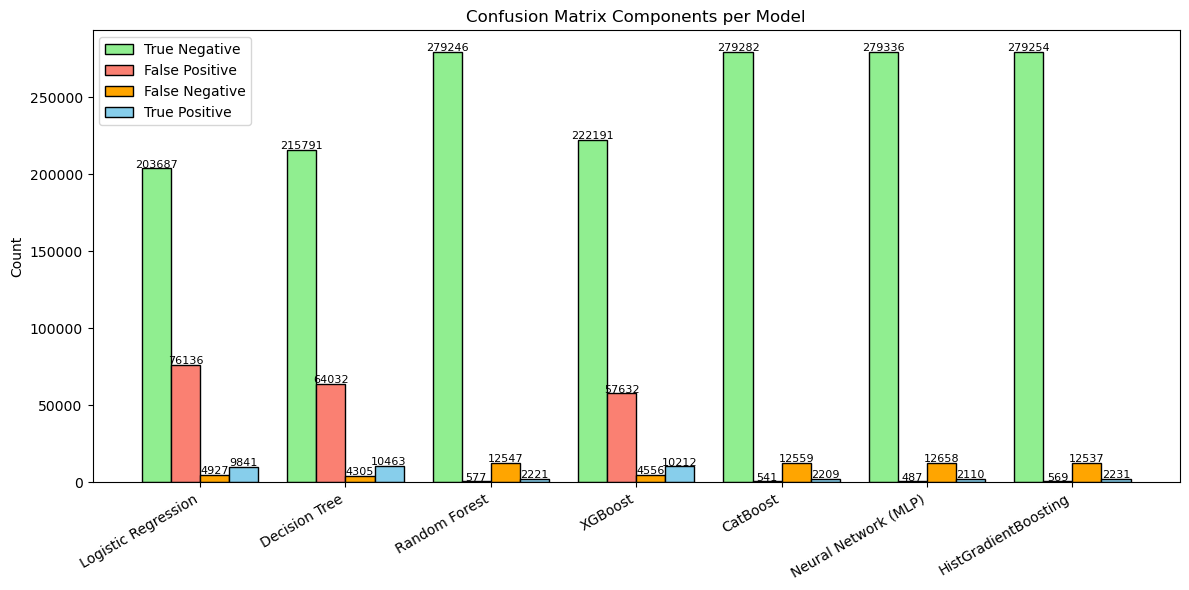

In [39]:
# Collect confusion matrix results
confusion_results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    confusion_results.append({
        "Model": name,
        "True Negative": tn,
        "False Positive": fp,
        "False Negative": fn,
        "True Positive": tp
    })

confusion_df = pd.DataFrame(confusion_results)

# Plot grouped bar chart
plt.figure(figsize=(12,6))
bar_width = 0.2
x = range(len(confusion_df))

plt.bar([i - 1.5*bar_width for i in x], confusion_df["True Negative"], 
        width=bar_width, label="True Negative", color="lightgreen", edgecolor="black")
plt.bar([i - 0.5*bar_width for i in x], confusion_df["False Positive"], 
        width=bar_width, label="False Positive", color="salmon", edgecolor="black")
plt.bar([i + 0.5*bar_width for i in x], confusion_df["False Negative"], 
        width=bar_width, label="False Negative", color="orange", edgecolor="black")
plt.bar([i + 1.5*bar_width for i in x], confusion_df["True Positive"], 
        width=bar_width, label="True Positive", color="skyblue", edgecolor="black")

# Labels
plt.xticks(x, confusion_df["Model"], rotation=30, ha="right")
plt.ylabel("Count")
plt.title("Confusion Matrix Components per Model")
plt.legend()

# Annotate values
for i in x:
    plt.text(i - 1.5*bar_width, confusion_df["True Negative"][i] + 500, 
             str(confusion_df["True Negative"][i]), ha="center", fontsize=8)
    plt.text(i - 0.5*bar_width, confusion_df["False Positive"][i] + 500, 
             str(confusion_df["False Positive"][i]), ha="center", fontsize=8)
    plt.text(i + 0.5*bar_width, confusion_df["False Negative"][i] + 500, 
             str(confusion_df["False Negative"][i]), ha="center", fontsize=8)
    plt.text(i + 1.5*bar_width, confusion_df["True Positive"][i] + 500, 
             str(confusion_df["True Positive"][i]), ha="center", fontsize=8)

plt.tight_layout()
plt.show()
